In [70]:
import pandas as pd
import numpy as np

In [71]:
df=pd.read_excel("knn.xlsx",sheet_name='train')
df_test=pd.read_excel("knn.xlsx",sheet_name='test')
df.head()

,X1,X2,X3,y
0,-0.059533,0.763686,0.317046,-0.070229
1,1.916473,-0.378508,-0.411538,1.887648
2,-0.237390,-0.244097,-1.053888,-0.316625
3,-0.579256,0.135478,-0.507913,-0.627537
4,0.873726,-1.569405,0.435819,0.987233


In [72]:
df['X3']=df['X3'].apply(lambda x:1 if x>0.5 else 0)

In [73]:
df_test['X3']=df_test['X3'].apply(lambda x:1 if x>0.5 else 0)

In [74]:
df_test.head()

,X1,X2,X3,y
0,0.295855,0.145806,1,0.408699
1,1.461282,0.807982,0,1.320564
2,-1.487283,0.294966,0,-1.589954
3,1.061516,1.475837,0,0.892074
4,-0.189910,-0.100671,0,-0.284978


In [75]:
df.shape

(719, 4)

In [76]:
X_train=df.iloc[:,0:3]
X_train.head()

,X1,X2,X3
0,-0.059533,0.763686,0
1,1.916473,-0.378508,0
2,-0.237390,-0.244097,0
3,-0.579256,0.135478,0
4,0.873726,-1.569405,0


In [77]:
y_train=df.iloc[:,-1]
y_train.head()

0   -0.070229
1    1.887648
2   -0.316625
3   -0.627537
4    0.987233
Name: y, dtype: float64

In [78]:
X_train.shape,y_train.shape

((719, 3), (719,))

In [79]:
#calulating the label y for first row of test data.

In [80]:
#1.take first point from x test and calculate distance from each point in test set.

In [81]:
df_test

,X1,X2,X3,y
0,0.295855,0.145806,1,0.408699
1,1.461282,0.807982,0,1.320564
2,-1.487283,0.294966,0,-1.589954
3,1.061516,1.475837,0,0.892074
4,-0.189910,-0.100671,0,-0.284978
...,...,...,...,...
276,-0.382505,-0.435133,0,-0.495246
277,-1.247482,0.404737,0,-1.223280
278,1.031076,-0.169142,1,1.142579
279,-0.712677,0.803115,0,-0.706962


In [82]:
test_X = df_test.iloc[:,:-1].values
test_y = df_test.iloc[:,-1].values
test_X=pd.DataFrame(test_X,columns=['X1','X2','X3'])
test_X

,X1,X2,X3
0,0.295855,0.145806,1.0
1,1.461282,0.807982,0.0
2,-1.487283,0.294966,0.0
3,1.061516,1.475837,0.0
4,-0.189910,-0.100671,0.0
...,...,...,...
276,-0.382505,-0.435133,0.0
277,-1.247482,0.404737,0.0
278,1.031076,-0.169142,1.0
279,-0.712677,0.803115,0.0


In [83]:
test_y=pd.DataFrame(test_y,columns=['y'])
test_y

,y
0,0.408699
1,1.320564
2,-1.589954
3,0.892074
4,-0.284978
...,...
276,-0.495246
277,-1.223280
278,1.142579
279,-0.706962


In [84]:
#calculating step1
xdis=np.sqrt((df.X1-df_test.X1.iloc[0])**2+(df.X2-df_test.X2.iloc[0])**2+(df.X3-df_test.X3.iloc[0])**2)
xdis=list(xdis)
xdis
# length is correct as 719 distances should be present calculated for each point 

[1.2280376584098687,
 1.9751721670780418,
 1.198488853574813,
 1.3288817035097646,
 2.067820854858436,
 0.752140277137729,
 2.0738155069282507,
 2.6785005581959855,
 1.0758880163630564,
 1.0912576430026684,
 2.9144732182363833,
 1.7701956488600035,
 1.955397496162496,
 0.5838625746082124,
 1.5107818659849304,
 2.682231911751834,
 1.9121476626622227,
 2.2189965572157178,
 1.5471536582753038,
 3.0493748311949376,
 1.2753225918077928,
 1.5707198534761153,
 0.38048084878716576,
 2.0372636217246485,
 1.3825153436588875,
 3.220918808093863,
 2.043930553401983,
 1.5055308302848411,
 1.4167257608796082,
 1.0017452655698045,
 1.954901440665668,
 3.0009471444546922,
 1.541289907376461,
 1.2964198755632446,
 1.603473696362863,
 1.103299634225597,
 1.6526864361005187,
 1.636752446547159,
 2.3960240205656462,
 2.1329957092196676,
 2.24846719789084,
 0.41152611476364753,
 2.0083289951359244,
 1.2694785693691537,
 1.3475771347595622,
 2.0160856747044384,
 1.774926025569134,
 1.7669014796407032,
 1.24

In [85]:
xdis=pd.Series(xdis)
xdis

0      1.228038
1      1.975172
2      1.198489
3      1.328882
4      2.067821
         ...   
714    1.227905
715    1.417806
716    0.644347
717    1.203444
718    1.859947
Length: 719, dtype: float64

In [86]:
df['xdis']=xdis

In [87]:
df

,X1,X2,X3,y,xdis
0,-0.059533,0.763686,0,-0.070229,1.228038
1,1.916473,-0.378508,0,1.887648,1.975172
2,-0.237390,-0.244097,0,-0.316625,1.198489
3,-0.579256,0.135478,0,-0.627537,1.328882
4,0.873726,-1.569405,0,0.987233,2.067821
...,...,...,...,...,...
714,0.893850,0.533300,0,0.896421,1.227905
715,-0.205388,1.016971,0,-0.377172,1.417806
716,0.408903,0.780158,1,0.413051,0.644347
717,1.472088,-0.108659,1,1.534758,1.203444


In [88]:
df.sort_values(by='xdis')

,X1,X2,X3,y,xdis
469,0.211575,0.194324,1,0.302570,0.097248
153,0.363677,0.073810,1,0.459780,0.098910
478,0.197186,0.131345,1,0.314025,0.099723
389,0.224506,0.016053,1,0.313182,0.148076
213,0.457125,0.167684,1,0.519838,0.162747
...,...,...,...,...,...
166,-2.781845,0.983806,0,-2.814545,3.342825
158,-2.336459,-1.872605,0,-2.262872,3.464544
487,-3.123194,-0.133982,0,-3.204782,3.573259
117,-2.964642,1.734502,1,-2.880547,3.626954


In [89]:
#2.sort the list to get top 3 nearest neighbors.

In [90]:
#3.find the index of those 3 neighbors value and their corressponding y value.

In [91]:
y_pred = np.mean([df.y[469], df.y[153], df.y[478]])
y_pred

0.35879165642160404

In [92]:
y_actual=df_test.iloc[0,-1]
y_actual

0.408698536273189

In [93]:
#4.find mape with the two values calculated.

In [94]:
Mape=np.mean(abs(y_pred - y_actual)/y_actual)*100
Mape

12.211171663757895

In [95]:
#looping the above steps to get for whole dataset.

In [96]:
y_actual

0.408698536273189

In [97]:
df_test.shape[0]

281

In [98]:
# Initialize empty arrays for actual and predicted values
y_actual = np.empty(len(df_test))
y_pred_array = np.empty(len(df_test))

# Loop through each row in the test set
for i in range(len(df_test)):
    xdis = np.sqrt((df.X1 - df_test.X1.iloc[i])**2 + (df.X2 - df_test.X2.iloc[i])**2 + (df.X3 - df_test.X3.iloc[i])**2)
    xdis = pd.Series(xdis)
    top = xdis.argsort()[:3]
    y_pred = df.y[top].mean()
    
    # Store the actual and predicted values for this row
    y_actual[i] = df_test.y.iloc[i]
    y_pred_array[i] = y_pred
    
    # Calculate the MAPE for this row
    mape = np.mean(np.abs((y_pred - y_actual[i]) / y_actual[i])) * 100
    print(f"MAPE for row {i}: {mape}%")
    
# Calculate the overall MAPE
mape_overall = np.mean(np.abs((y_pred_array - y_actual) / y_actual)) * 100
print(f"Overall MAPE: {mape_overall}%")


MAPE for row 0: 12.211171663757895%
MAPE for row 1: 0.5170735375909354%
MAPE for row 2: 13.32219207638922%
MAPE for row 3: 1.4192776890233387%
MAPE for row 4: 9.006423771531459%
MAPE for row 5: 19.55683613326121%
MAPE for row 6: 6.961024320853465%
MAPE for row 7: 23.329636776312654%
MAPE for row 8: 50.21866626312368%
MAPE for row 9: 95.0140340236994%
MAPE for row 10: 10.449313361836388%
MAPE for row 11: 15.417553386032667%
MAPE for row 12: 250.17949089599992%
MAPE for row 13: 4.016734487591527%
MAPE for row 14: 27.069881691970917%
MAPE for row 15: 22.12543052466158%
MAPE for row 16: 0.043218863808820465%
MAPE for row 17: 3.4089050005401766%
MAPE for row 18: 61.46237099761366%
MAPE for row 19: 13.434765998027423%
MAPE for row 20: 4.2115759041176775%
MAPE for row 21: 46.66178558176359%
MAPE for row 22: 2321.609056553657%
MAPE for row 23: 3.271922427072524%
MAPE for row 24: 51.879755248183855%
MAPE for row 25: 12.751216739820526%
MAPE for row 26: 22.684987942360294%
MAPE for row 27: 2.810

In [99]:
print(f"Overall MAPE: {mape_overall}%")

Overall MAPE: 44.058069415782825%


In [100]:
# KNN regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_percentage_error
from math import sqrt
from sklearn.metrics import mean_squared_error, r2_score

In [101]:
#train
K = 3
model = KNeighborsRegressor(n_neighbors = K)
model.fit(X_train, y_train)  #fit the model
pred=model.predict(test_X) #make prediction on test set
mape_knn = mean_absolute_percentage_error(test_y, pred)*100

print('MAPE value for k= ' , K , 'is:', mape_knn)

MAPE value for k=  3 is: 44.058069415782825


Best k value: 8
Lowest MAPE: 30.412858162130448%


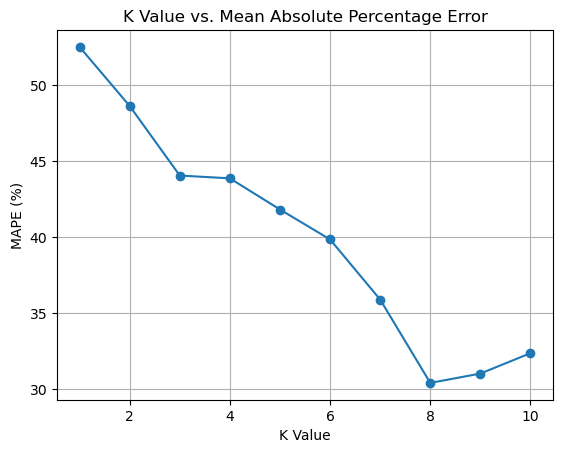

In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error

# Initialize empty arrays for actual and predicted values
y_actual = np.empty(len(df_test))
y_pred_array = np.empty(len(df_test))

# Initialize an array to store MAPE values for different k values
mape_values = []

# Define a range of k values to try
k_values = range(1, 11)  # You can adjust this range as needed

for k in k_values:
    # Loop through each row in the test set
    for i in range(len(df_test)):
        xdis = np.sqrt((df.X1 - df_test.X1.iloc[i])**2 + (df.X2 - df_test.X2.iloc[i])**2 + (df.X3 - df_test.X3.iloc[i])**2)
        xdis = pd.Series(xdis)
        top = xdis.argsort()[:k]
        y_pred = df.y[top].mean()
        
        # Store the actual and predicted values for this row
        y_actual[i] = df_test.y.iloc[i]
        y_pred_array[i] = y_pred
        
    # Calculate the MAPE for this k value
    mape = np.mean(np.abs((y_pred_array - y_actual) / y_actual)) * 100
    mape_values.append(mape)

# Calculate the overall MAPE for each k
mape_values = np.array(mape_values)

# Find the best k value with the lowest MAPE
best_k = k_values[np.argmin(mape_values)]
best_mape = np.min(mape_values)

# Print the best k value and corresponding MAPE
print(f"Best k value: {best_k}")
print(f"Lowest MAPE: {best_mape}%")

# Plot k values against MAPE values
plt.plot(k_values, mape_values, marker='o')
plt.title('K Value vs. Mean Absolute Percentage Error')
plt.xlabel('K Value')
plt.ylabel('MAPE (%)')
plt.grid(True)
plt.show()


In [116]:
def find_best_k(df, df_test, k_values):
    y_actual = np.empty(len(df_test))
    y_pred_array = np.empty(len(df_test))
    mape_values = []

    for k in k_values:
        for i in range(len(df_test)):
            xdis = np.sqrt((df.X1 - df_test.X1.iloc[i])**2 + (df.X2 - df_test.X2.iloc[i])**2 + (df.X3 - df_test.X3.iloc[i])**2)
            xdis = pd.Series(xdis)
            top = xdis.argsort()[:k]
            y_pred = df.y[top].mean()

            y_actual[i] = df_test.y.iloc[i]
            y_pred_array[i] = y_pred

        mape = np.mean(np.abs((y_pred_array - y_actual) / y_actual)) * 100
        mape_values.append(mape)

    mape_values = np.array(mape_values)
    best_k = k_values[np.argmin(mape_values)]
    best_mape = np.min(mape_values)

    return best_k



In [117]:
# Example :

best_k = find_best_k(df, df_test, k_values_to_try)

print(f"Best k value: {best_k}")


Best k value: 8
